In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [20]:
sns.set()

In [6]:
reliance = yf.Ticker("RELIANCE.NS")
infy = yf.Ticker("INFY.NS")

In [11]:
infy_sector = infy.info['sector']
infy_industry = infy.info['industry']
reliance_sector = reliance.info['sector']
reliance_industry = reliance.info['industry']
print(f'Reliance - Sector: {reliance_sector}\tIndustry:{reliance_industry}')
print(f'Infy - Sector: {infy_sector}\tIndustry:{infy_industry}')

Reliance - Sector: Energy	Industry:Oil & Gas Refining & Marketing
Infy - Sector: Technology	Industry:Information Technology Services


In [22]:
reliance_hist = reliance.history(period='5y')
infy_hist = infy.history(period='5y')

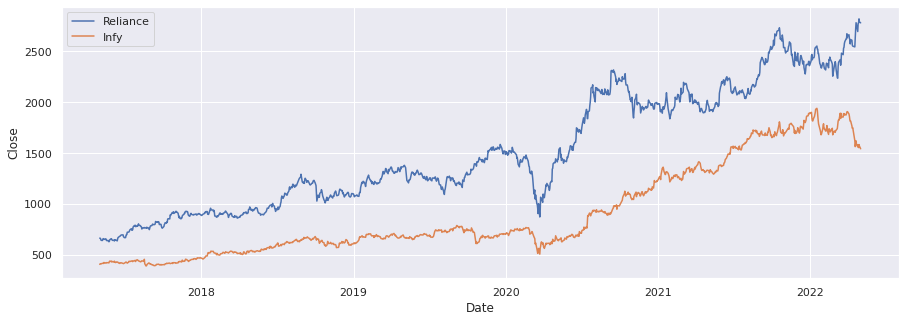

In [24]:
plt.rcParams['figure.figsize'] = (15,5)
sns.lineplot(data=reliance_hist, x='Date',y='Close',label='Reliance')
sns.lineplot(data=infy_hist, x='Date',y='Close',label='Infy')
plt.show()

In [26]:
infy.actions

,Dividends,Stock Splits
Date,,
2017-06-01,7.375,0.0
2017-10-31,6.500,0.0
2018-06-14,5.000,0.0
2018-09-04,0.000,2.0
2018-10-25,7.000,0.0
2019-01-24,4.000,0.0
2019-06-13,10.500,0.0
2019-10-22,8.000,0.0
2019-10-23,8.000,0.0


In [37]:
infy.calendar

,0,1
Earnings Date,2022-07-12 06:15:00,2022-07-16 10:15:00
Earnings Average,13.6,13.6
Earnings Low,13,13
Earnings High,15.02,15.02
Revenue Average,340067000000,340067000000
Revenue Low,336297000000,336297000000
Revenue High,343008000000,343008000000


In [38]:
tickers = yf.Tickers('INFY.NS RELIANCE.NS')

In [43]:
tickers.tickers['INFY.NS'].info.keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'fax', 'industry', 'address2', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskR

Data to fetch

- sector
- industry
- ebitdaMargins
- profitMargins
- revenueGrowth
- currentRatio
- returnOnAssets
- debtToEquity
- returnOnEquity
- totalCashPerShare
- revenuePerShare
- quickRatio
- enterpriseToRevenue
- beta3Year
- enterpriseToEbitda
- trailingEps
- priceToBook
- shortRatio
- beta
- enterpriseValue
- threeYearAverageReturn
- forwardPE
- trailingPE
- fiftyDayAverage
- twoHundredDayAverage

In [52]:
stock_portfolio_filepath = 'data/StockPortfolio/holdings-CG5281.xlsx'
stock_portfolio = pd.read_excel(stock_portfolio_filepath, skiprows=22)
stock_portfolio = stock_portfolio.drop(stock_portfolio.columns[0], axis=1)

In [53]:
stock_portfolio.head()

,Symbol,ISIN,Sector,Quantity Available,Quantity Discrepant,Quantity Long Term,Quantity Pledged (Margin),Quantity Pledged (Loan),Average Price,Previous Closing Price,Unrealized P&L,Unrealized P&L Pct.
0,ADANIENT,INE423A01024,Industrials,7.0,0.0,4.0,0.0,0.0,1187.8571,2339.50,8061.50,96.9513
1,APOLLOTYRE,INE438A01022,Consumer Discretionary,10.0,0.0,10.0,0.0,0.0,143.3000,202.60,593.00,41.3817
2,ASIANPAINT,INE021A01026,Materials,9.0,0.0,8.0,0.0,0.0,2253.8111,3200.00,8515.70,41.9817
3,AWL,INE699H01024,undefined,2.0,0.0,0.0,0.0,0.0,800.0000,753.65,-92.70,-5.7938
4,BAJFINANCE,INE296A01024,Financials,3.0,0.0,1.0,0.0,0.0,5590.8000,6626.15,3106.05,18.5188


In [63]:
yahoo_stock_symbols = [symbol+".NS" for symbol in stock_portfolio['Symbol']]
yahoo_stock_symbols_joined = " ".join(yahoo_stock_symbols)
yahoo_stock_symbols_joined

'ADANIENT.NS APOLLOTYRE.NS ASIANPAINT.NS AWL.NS BAJFINANCE.NS BHARTIARTL.NS COALINDIA.NS DABUR.NS DEEPAKNTR.NS DMART.NS HDFC.NS HDFCBANK.NS HDFCLIFE.NS HINDALCO.NS HINDUNILVR.NS ICICIBANK.NS INDIGO.NS INFY.NS IOC.NS IRCTC.NS ITC.NS JUBLFOOD.NS LT.NS MARUTI.NS MINDTREE.NS M&M.NS ONGC.NS RELIANCE.NS SBICARD.NS SBIN.NS SUNPHARMA.NS TATACONSUM.NS TATAMOTORS.NS TATASTEEL.NS TCS.NS TITAN.NS TVSMOTOR.NS ULTRACEMCO.NS WIPRO.NS'

In [64]:
tickers = yf.Tickers(yahoo_stock_symbols_joined)

In [67]:
tickers.tickers['ASIANPAINT.NS'].info

{'zip': '400055',
 'sector': 'Basic Materials',
 'fullTimeEmployees': 7134,
 'longBusinessSummary': 'Asian Paints Limited, together with its subsidiaries, manufactures, sells, and distributes paints and coatings for decorative and industrial use in India and internationally. It operates in Paints and Home Improvement segments. The company offers decorative coatings for interior and exterior walls, metal finishes, and wood finishes; mechanized tools and waterproofing products; adhesives; bath fittings and accessories; modular kitchens and wardrobes; wall coverings and stickers; furniture; furnishings and lightings; kitchen hardware, accessories, and appliances; home décor products; and sanitizers and surface disinfectants, as well as services, including color consultancy, home painting, décor, project, interior design, and sanitization services. It also manufactures varnishes, enamels, or lacquers; surfacing preparations; organic composite solvents and thinners, and other related produc

In [ ]:
stock_metrics = ['sector', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'revenueGrowth', 'operatingMargins', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'debtToEquity', 'returnOnEquity', 'revenuePerShare', 'quickRatio', 'shortName', 'longName',  'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', 'forwardEps', 'trailingEps', 'priceToBook', 'shortRatio', 'beta', 'enterpriseValue', 'priceHint', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 'lastDividendDate', 'morningStarOverallRating', 'earningsQuarterlyGrowth', 'priceToSalesTrailing12Months', 'dateShortInterest', 'pegRatio', 'ytdReturn', 'forwardPE', 'lastCapGain', 'shortPercentOfFloat', 'sharesShortPriorMonth', 'impliedSharesOutstanding', 'category', 'fiveYearAverageReturn', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 'averageDailyVolume10Day', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 'expireDate', 'algorithm', 'dividendRate', 'exDividendDate', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'currency', 'trailingPE', 'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'dayLow', 'ask', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeable', 'dividendYield', 'bidSize', 'dayHigh', 'regularMarketPrice', 'preMarketPrice', 'logo_url', 'trailingPegRatio']